---
> # **BACKTEST** - Estratégia *Goleador*
---

A estratégia é bem simples:

* Timeframe diário;
* Sinal de entrada: candle fecha com pelo menos 1% da mínima dos últimos dois candles;
* Comprar próximo do fechamento com stop emergencial de 6% a 8%;
* Alvo da saída é na metade do candle sinal.

_OBS.: estratégia retirada do canal do **Arthur 777 - Estratégias na Bolsa** no vídeo: [MM2! Esse Setup tem 90% de Acerto nos Trades Usando Esse Sistema de Alvos Aqui](https://www.youtube.com/watch?v=Z6-OdlX5Q4A&t=39s)_

In [1]:
# Análise e manipulação de dados gerais
import numpy as np
import pandas as pd

# Dados séries temporais
from datetime import datetime, timedelta
import pytz

# Dados OHLCV
from mt5linux import MetaTrader5
from datetime import datetime

# connecto to the server
mt5 = MetaTrader5()
mt5.execute('import datetime')

# Bibliotecas gráficas
import mplfinance as mpf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1 - Obtenção dos dados

In [2]:
mt5.initialize()

True

In [3]:
ticker = 'TRPL4'

In [4]:
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=5000)
data_fim = datetime.now()

In [5]:
dados_ohlcv = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_D1, data_inicio, data_fim)
dados_ohlcv = pd.DataFrame(dados_ohlcv)
dados_ohlcv['ticker'] = str(ticker)
dados_ohlcv['timeframe'] = 'diario'
dados_ohlcv.index = pd.to_datetime(dados_ohlcv['time'], unit='s')
dados_ohlcv = dados_ohlcv.drop('time', axis=1)
dados_ohlcv

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe
time,,,,,,,,,
2018-04-03,10.38,10.38,10.25,10.31,1307,1,915600,TRPL4,diario
2018-04-04,10.24,10.37,10.24,10.35,1791,1,929200,TRPL4,diario
2018-04-05,10.38,10.42,10.24,10.24,1405,1,968800,TRPL4,diario
2018-04-06,10.28,10.32,10.16,10.31,843,1,886000,TRPL4,diario
2018-04-09,10.38,10.38,10.19,10.26,1659,1,1010000,TRPL4,diario
...,...,...,...,...,...,...,...,...,...
2023-03-28,21.85,22.10,21.77,21.88,5885,1,1650400,TRPL4,diario
2023-03-29,21.89,21.89,21.52,21.69,9611,1,2655500,TRPL4,diario
2023-03-30,21.81,21.94,21.64,21.69,5985,1,1990400,TRPL4,diario


## 1.1 - Configurando média deslocada

In [6]:
data = dados_ohlcv.copy()

data['mm2'] = data.low.rolling(window=2, closed='left').min() * 0.99
data

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm2
time,,,,,,,,,,
2018-04-03,10.38,10.38,10.25,10.31,1307,1,915600,TRPL4,diario,NaN
2018-04-04,10.24,10.37,10.24,10.35,1791,1,929200,TRPL4,diario,NaN
2018-04-05,10.38,10.42,10.24,10.24,1405,1,968800,TRPL4,diario,10.1376
2018-04-06,10.28,10.32,10.16,10.31,843,1,886000,TRPL4,diario,10.1376
2018-04-09,10.38,10.38,10.19,10.26,1659,1,1010000,TRPL4,diario,10.0584
...,...,...,...,...,...,...,...,...,...,...
2023-03-28,21.85,22.10,21.77,21.88,5885,1,1650400,TRPL4,diario,21.1068
2023-03-29,21.89,21.89,21.52,21.69,9611,1,2655500,TRPL4,diario,21.5523
2023-03-30,21.81,21.94,21.64,21.69,5985,1,1990400,TRPL4,diario,21.3048


# 2. Filtrando as entradas

In [7]:
def sinal_compra(mm2, close):
    regra = close <= mm2
    return regra

In [8]:
data['entrada_compra'] = sinal_compra(data.mm2, data.close)

In [9]:
df_compra = data[data['entrada_compra'] == True]
df_compra

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm2,entrada_compra
time,,,,,,,,,,,
2018-05-15,10.61,10.61,10.04,10.34,5998,1,3782000,TRPL4,diario,10.3752,True
2018-06-07,10.88,10.88,10.55,10.59,4703,1,2764000,TRPL4,diario,10.6128,True
2018-06-08,10.63,10.70,10.18,10.31,4731,1,2837600,TRPL4,diario,10.4445,True
2018-08-21,9.99,10.01,9.73,9.79,1891,1,962000,TRPL4,diario,9.8505,True
2018-08-30,9.87,9.87,9.63,9.63,1411,1,1053200,TRPL4,diario,9.6822,True
2018-09-25,9.57,9.57,9.42,9.44,1403,1,676000,TRPL4,diario,9.4842,True
2018-10-11,10.30,10.49,10.03,10.14,2822,1,1739600,TRPL4,diario,10.1475,True
2018-11-23,12.11,12.16,11.71,11.76,3035,1,1719600,TRPL4,diario,11.7810,True
2018-12-07,12.57,12.60,12.12,12.25,5676,1,7569200,TRPL4,diario,12.4542,True


## 2.1 - Visualizando as entradas com stop loss e take profit

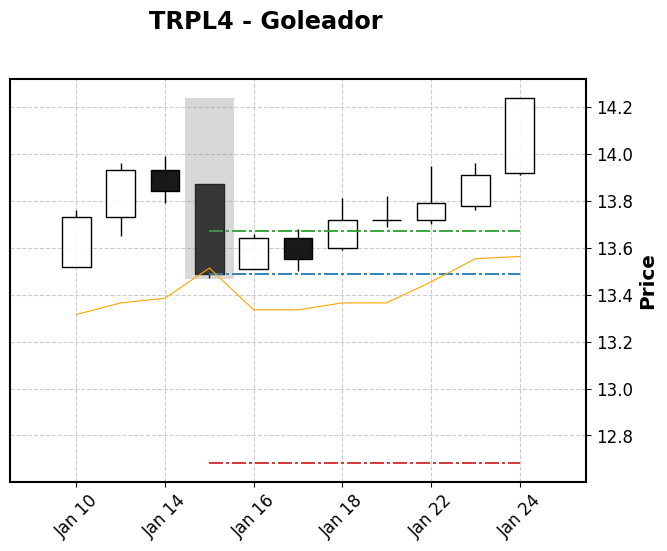

In [10]:
stop = 0.94

n_index = 9
inicio = df_compra.iloc[n_index].name - timedelta(days=5)
fim = df_compra.iloc[n_index].name + timedelta(days=10)

candle_index = 3

dfpl = data.loc[inicio:fim]

candle_signal = dfpl.index[candle_index].strftime('%Y-%m-%d')
candle_end = dfpl.index[-1].strftime('%Y-%m-%d')

ponto_entrada = dfpl['close'].loc[candle_signal]
ponto_stop = dfpl['close'].loc[candle_signal] * stop
ponto_take = (dfpl['high'].loc[candle_signal] + dfpl['low'].loc[candle_signal])/2

lines = [[(candle_signal,ponto_stop),(candle_end, ponto_stop)],
         [(candle_signal,ponto_entrada),(candle_end, ponto_entrada)],
         [(candle_signal,ponto_take),(candle_end, ponto_take)]]

adp = [mpf.make_addplot(dfpl.mm2, color='orange', width=0.8)]

alines = dict(alines=lines, linestyle='-.', colors=['tab:red', 'tab:blue', 'tab:green'], alpha=0.9, linewidths=1.5)
vlines=dict(vlines=candle_signal,linewidths=35, alpha=0.3, colors='tab:gray')
mpf.plot(dfpl, title=f'{ticker} - Goleador', type='candle', style='classic', vlines=vlines, alines=alines, addplot=adp)

# 3. Realizando o backtest

In [11]:
stop = 0.94 # 6% de stop

position = 0

ls_data_compra_entrada = []
ls_preco_compra_entrada = []

ls_data_compra_saida = []
ls_preco_compra_saida = []
ls_motivo_compra_saida = []

for i in range(len(data)):
    if (position == 0) and (data['entrada_compra'].iloc[i] == True):
        ls_data_compra_entrada.append(data.index[i])
        ls_preco_compra_entrada.append(data['close'].iloc[i])
        position = 1
        
        preco_entrada = data['close'].iloc[i]
        stop_loss = preco_entrada * stop
        take_profit = (data['high'].iloc[i] + data['low'].iloc[i])/2
    
    # Saída na abertura do gap de baixa
    elif (position == 1) and (data['open'].iloc[i] < stop_loss):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(data['open'].iloc[i])
        ls_motivo_compra_saida.append('STOP')
        position = 0
    # Saída no stop loss
    elif (position == 1) and (data['low'].iloc[i] <= stop_loss):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(stop_loss)
        ls_motivo_compra_saida.append('STOP')
        position = 0
    
    # Saída na abertura do gap de alta
    elif (position == 1) and (data['open'].iloc[i] > take_profit):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(data['open'].iloc[i])
        ls_motivo_compra_saida.append('TAKE')
        position = 0
    # Saída no take profit
    elif (position == 1) and (data['high'].iloc[i] >= take_profit):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(take_profit)
        ls_motivo_compra_saida.append('TAKE')
        position = 0
        
tabela_result_compras = pd.DataFrame(zip(ls_data_compra_entrada, ls_preco_compra_entrada, ls_data_compra_saida, ls_preco_compra_saida, ls_motivo_compra_saida),
                                    columns=['data_entrada', 'preco_entrada', 'data_saida', 'preco_saida', 'motivo_saida'])
tabela_result_compras['data_entrada'] = pd.to_datetime(tabela_result_compras['data_entrada'], errors='ignore')
tabela_result_compras['data_saida'] = pd.to_datetime(tabela_result_compras['data_saida'], errors='ignore')
tabela_result_compras['resultado'] = tabela_result_compras['preco_saida']/tabela_result_compras['preco_entrada'] - 1
tabela_result_compras['resultado_pontos'] = tabela_result_compras['preco_saida'] - tabela_result_compras['preco_entrada']

# 4. Visualizando os resultados

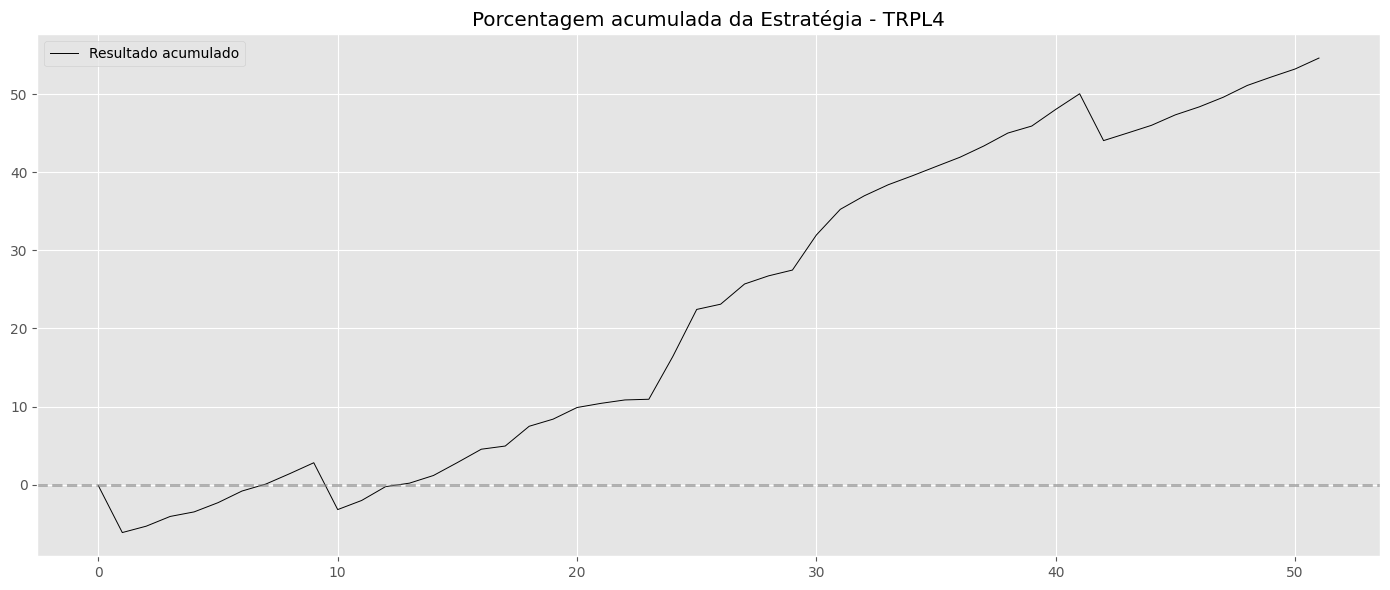

In [12]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(14,6))
plt.title(f'Porcentagem acumulada da Estratégia - {ticker}')
plt.plot(tabela_result_compras['resultado'].cumsum()*100, lw=0.7, color='black', label='Resultado acumulado')
plt.axhline(0, color='gray', ls='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show();

In [13]:
soma_take = tabela_result_compras[tabela_result_compras['motivo_saida'] == 'TAKE']['resultado'].sum()
soma_stop = tabela_result_compras[tabela_result_compras['motivo_saida'] == 'STOP']['resultado'].sum()

qtd_take = tabela_result_compras[tabela_result_compras['motivo_saida'] == 'TAKE']['resultado'].count()
qtd_stop = tabela_result_compras[tabela_result_compras['motivo_saida'] == 'STOP']['resultado'].count()

print(f'\n\nBacktest do GOLEADOR - {ticker}')

print(f'\nInício do backtest: {data.index[0]}')
print(f'Fim do backtest: {data.index[-1]}')
print(f'Quantidade de dias: {data.index[-1] - data.index[0]}')

print(f'\nQuantidade total de trades: {qtd_take+qtd_stop}')
print(f'Quantidade de saídas no take profit: {qtd_take}')
print(f'Quantidade de saídas no stop loss: {qtd_stop}')

print(f'\nTaxa de acerto: {round((qtd_take/(qtd_take + qtd_stop)) * 100, 2)}%')

print(f'\nSoma percentual de saídas por take profit: {round(soma_take*100, 2)}%')
print(f'Soma percentual de saídas por stop loss: {round(soma_stop*100, 2)}%')

print(f'\nResultado Percentual Acumulado: {round((soma_take + soma_stop)*100, 2)}%')
print(f'Media percentual de lucro por trade: {round((tabela_result_compras["resultado"].mean())*100, 2)}%')



Backtest do GOLEADOR - TRPL4

Início do backtest: 2018-04-03 00:00:00
Fim do backtest: 2023-04-03 00:00:00
Quantidade de dias: 1826 days 00:00:00

Quantidade total de trades: 52
Quantidade de saídas no take profit: 49
Quantidade de saídas no stop loss: 3

Taxa de acerto: 94.23%

Soma percentual de saídas por take profit: 72.64%
Soma percentual de saídas por stop loss: -18.0%

Resultado Percentual Acumulado: 54.64%
Media percentual de lucro por trade: 1.05%
